In [1]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 20
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=1

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [3]:
liste_moy_gamma_kbt=[]
liste_moy_rugosite_kbt=[]
liste_std_gamma_kbt=[]
liste_std_rugosite_kbt=[]
hauteur_initiale=10
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 20
        y = 60
        grid = domain.create_grid(x,y,hauteur_initiale)     # [hauteur, largeur]
        position_surface=domain.find_surface(grid)
        grid_f, deltatemps_reel, parametres, pos_surface = KMC2D(grid, position_surface, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True,gif=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_rugosite)

    liste_moy_gamma_kbt.append(gamma_moy_param)
    liste_moy_rugosite_kbt.append(rugosite_moy_param)

    liste_std_gamma_kbt.append(gamma_std_param)
    liste_std_rugosite_kbt.append(rugosite_std_param)



0.5
Le site du changement est 18
L'atome est Cl
Le site gauche est Na, à la position 17 
La valeur finale de gauche est 17
La valeur de proximité gauche est 1
0  Diffusion à droite au site 18 type 3
1  L'événement est une adsorption au site 18
Le site du changement est 1
L'atome est Na
Le site gauche est Cl, à la position 0 
La valeur finale de gauche est 0
La valeur de proximité gauche est 1
2  Diffusion à droite au site 1 type 3
3  L'événement est une désorption au site 0
Le site du changement est 11
L'atome est Na
Le site gauche est Cl, à la position 10 
La valeur finale de gauche est 10
La valeur de proximité gauche est 1
4  Diffusion à gauche au site 11 type 4
Na
Le site du changement est 1
L'atome est Cl
Le site gauche est Na, à la position 0 
La valeur finale de gauche est 0
La valeur de proximité gauche est 1
5  Diffusion à gauche au site 1 type 4
Le site du changement est 7
L'atome est Na
Le site gauche est Cl, à la position 6 
La valeur finale de gauche est 6
La valeur de pro

KeyboardInterrupt: 

In [9]:
liste_gamma_moy_mu=[]
liste_rugosite_moy_mu=[]
liste_gamma_std_mu=[]
liste_rugosite_std_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 20
        y = 60
        grid = domain.create_grid(x,y, hauteur_initiale)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_rugosite)

    liste_gamma_moy_mu.append(gamma_moy_param)
    liste_rugosite_moy_mu.append(rugosite_moy_param)

    liste_gamma_std_mu.append(gamma_std_param)
    liste_rugosite_std_mu.append(rugosite_std_param)

-1.0


TypeError: KMC2D() missing 1 required positional argument: 'nb_pas_temps'

In [20]:
print(liste_rugosite)

[1.5620499351813306, 2.108909670896314, 2.1742814905158903, 1.6613247725836144, 2.233830790368868, 2.014944167960988, 2.132486811213612, 1.851350858157362, 1.5652475842498532, 1.6124515496597103]


C:\Users\laure\AppData\Local\Temp\ipykernel_16244\516333716.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\laure\AppData\Local\Temp\ipykernel_16244\516333716.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


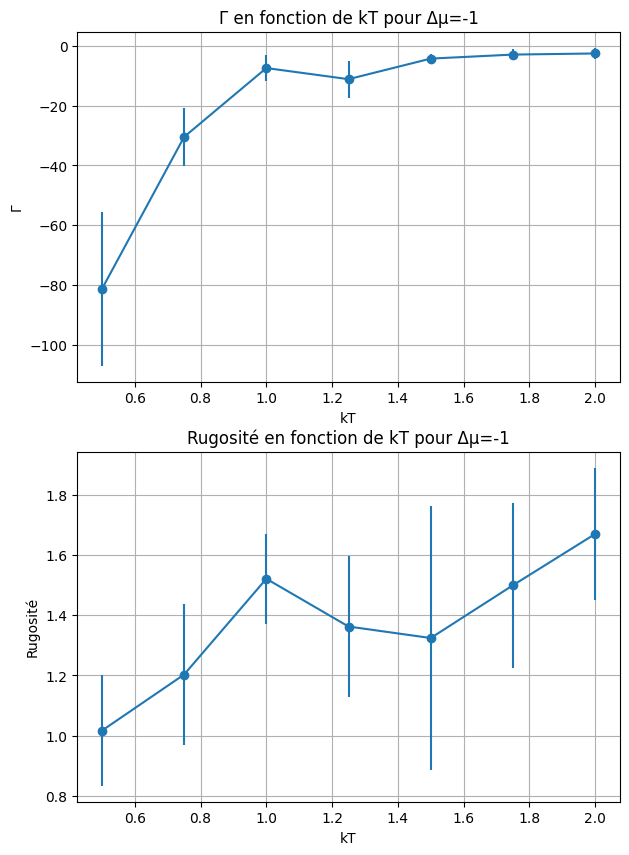

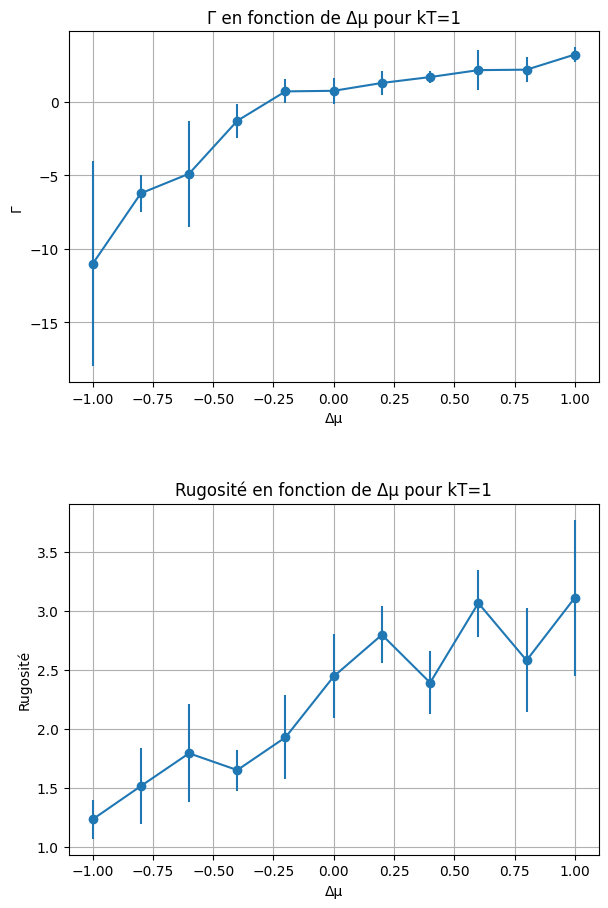

In [18]:
fig,ax=plt.subplots(2,figsize=(7,10))
ax[0].errorbar(liste_kT,liste_moy_gamma_kbt,liste_std_gamma_kbt,fmt='o')
ax[0].plot(liste_kT,liste_moy_gamma_kbt,color='#1f77b4')
ax[0].grid()
ax[0].set_xlabel('kT')
ax[0].set_ylabel('Γ')
ax[0].set_title("Γ en fonction de kT pour Δμ=-1")

ax[1].errorbar(liste_kT,liste_moy_rugosite_kbt,liste_std_rugosite_kbt,fmt='o')
ax[1].plot(liste_kT,liste_moy_rugosite_kbt,color='#1f77b4')
ax[1].grid()
ax[1].set_xlabel('kT')
ax[1].set_ylabel('Rugosité')
ax[1].set_title("Rugosité en fonction de kT pour Δμ=-1")
fig.show()

fig,ax=plt.subplots(2,figsize=(7,10))
ax[0].errorbar(liste_deltamu,liste_gamma_moy_mu,liste_gamma_std_mu,fmt='o')
ax[0].plot(liste_deltamu,liste_gamma_moy_mu,color='#1f77b4')
ax[0].grid()
ax[0].set_xlabel('Δμ')
ax[0].set_ylabel('Γ')
ax[0].set_title("Γ en fonction de Δμ pour kT=1")

ax[1].errorbar(liste_deltamu,liste_rugosite_moy_mu,liste_rugosite_std_mu,fmt='o')
ax[1].plot(liste_deltamu,liste_rugosite_moy_mu,color='#1f77b4')
ax[1].grid()
ax[1].set_xlabel('Δμ')
ax[1].set_ylabel('Rugosité')
ax[1].set_title("Rugosité en fonction de Δμ pour kT=1")
fig.tight_layout(pad=4.0) 
fig.show()

In [6]:
nb_passimu=1000
x=20
y=100
hauteur_substrat=20
grid = domain.create_grid(x,y,hauteur_substrat)
interpreter.save_graph(grid,0,0)
a,b,c=KMC2D(grid,liste_kT[-1],liste_deltamu[-1],nb_passimu,True,True,True)
print(c[0][-1])
print(c[1][-1])

L'événement est une adsorption au site 16
L'événement est une adsorption au site 1
L'événement est une adsorption au site 19
L'événement est une adsorption au site 11
L'événement est une adsorption au site 12
L'événement est une adsorption au site 19
L'événement est une adsorption au site 5
L'événement est une adsorption au site 6
L'événement est une désorption au site 15
L'événement est une désorption au site 7
L'événement est une adsorption au site 17
L'événement est une adsorption au site 2
L'événement est une adsorption au site 16
L'événement est une adsorption au site 17
L'événement est une adsorption au site 4
L'événement est une adsorption au site 10
L'événement est une adsorption au site 19
L'événement est une adsorption au site 17
L'événement est une désorption au site 15
L'événement est une désorption au site 5
L'événement est une désorption au site 6
L'événement est une désorption au site 1
L'événement est une désorption au site 3
L'événement est une adsorption au site 0
L'é

C:\Users\laure\AppData\Local\Temp\ipykernel_16244\748968733.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\laure\AppData\Local\Temp\ipykernel_16244\748968733.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


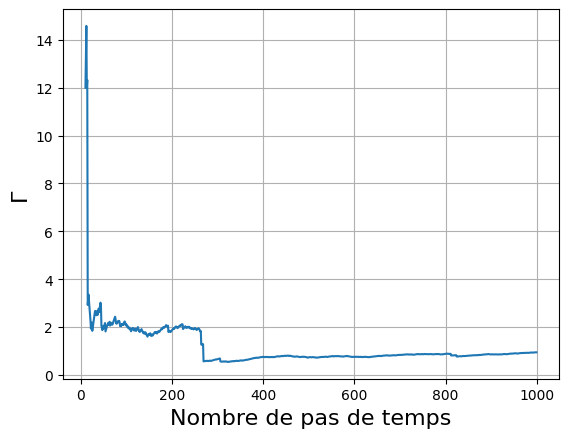

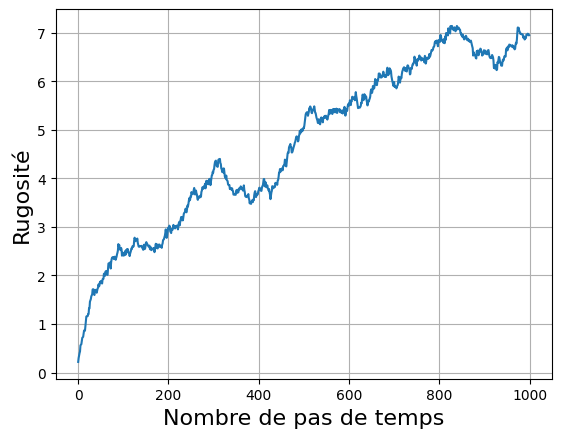

In [8]:
# interpreter.creer_gif("frames",fps=20)
axe_x=[i for i in range(nb_passimu)]
fig,ax=plt.subplots()
ax.plot(axe_x[10:],c[0][10:])
ax.grid()
ax.set_xlabel("Nombre de pas de temps",fontsize=16)
ax.set_ylabel("Γ",fontsize=16)
fig.show()

fig,ax=plt.subplots()
ax.plot(axe_x,c[1])
ax.set_xlabel("Nombre de pas de temps",fontsize=16)
ax.set_ylabel("Rugosité",fontsize=16)
ax.grid()
fig.show()
